# Exploratory Data Analysis and Data Preprocessing #
You will be expected to read in a dataset from the https://github.com/rfordatascience/tidytuesday/tree/main/data/2024 datasets for the purpose of exploratory data analysis and preprocessing.

## Part 1: Exploratory Data Analysis ##

### Assignment 1: Data Overview (20 Points) ###
- Load the dataset into a Pandas DataFrame and display the first few rows.
- Provide a basic description of the dataset, including its shape, columns, and data types.

***Hint***
- Use functions like **.head()**, **.shape**, **.columns**, and **.dtypes** to get an overview of your **DataFrame**.
- Remember that **.info()** can be used to get a concise summary of the **DataFrame** including the non-null count and type of each column.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-01-23/english_education.csv"
df = pd.read_csv(url)

# Assignment 1
print(df.head())
print("-----")
print(df.shape)  # (rows, columns)
print("-----")
print(df.columns)
print("-----")
print(df.dtypes)
print("-----")
print(df.info())

    town11cd                      town11nm  population_2011    size_flag  \
0  E34000007       Carlton in Lindrick BUA           5456.0  Small Towns   
1  E34000016  Dorchester (West Dorset) BUA          19060.0  Small Towns   
2  E34000020                       Ely BUA          19090.0  Small Towns   
3  E34000026           Market Weighton BUA           6429.0  Small Towns   
4  E34000027            Downham Market BUA          10884.0  Small Towns   

                    rgn11nm      coastal          coastal_detailed   ttwa11cd  \
0             East Midlands  Non-coastal  Smaller non-coastal town  E30000291   
1                South West  Non-coastal  Smaller non-coastal town  E30000046   
2           East of England  Non-coastal  Smaller non-coastal town  E30000186   
3  Yorkshire and The Humber  Non-coastal  Smaller non-coastal town  E30000220   
4           East of England  Non-coastal  Smaller non-coastal town  E30000225   

                  ttwa11nm                   ttwa_classi

### Assignment 2: Univariate Analysis (10 Points) ###
- For numerical features, calculate descriptive statistics and create histograms.
- For categorical features, count unique values and create bar plots.
  
***Hint***
- Use **.describe()** for a quick statistical summary of the numerical features.
- Utilize **matplotlib** or **seaborn** libraries to create histograms (**hist()** or **sns.histplot()**).
- For categorical data, **value_counts()** can help in understanding the distribution of classes, and you can plot the results using **bar()** or **sns.countplot()**.

       population_2011  ks4_2012_2013_counts  \
count     1.100000e+03           1104.000000   
mean      3.334663e+04            511.562500   
std       6.249984e+04           2667.687557   
min       5.003000e+03             14.000000   
25%       8.076000e+03             92.000000   
50%       1.543600e+04            172.500000   
75%       3.272175e+04            374.250000   
max       1.085810e+06          59743.000000   

       key_stage_2_attainment_school_year_2007_to_2008  \
count                                      1104.000000   
mean                                         74.066442   
std                                           8.506188   
min                                          28.089888   
25%                                          68.690113   
50%                                          74.211954   
75%                                          80.019342   
max                                          98.630137   

       key_stage_4_attainment_school_year_20

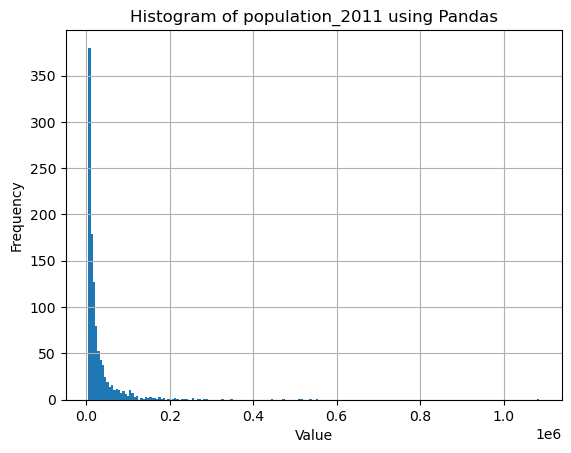

-----
Histogram of population_2011 using Seaborn


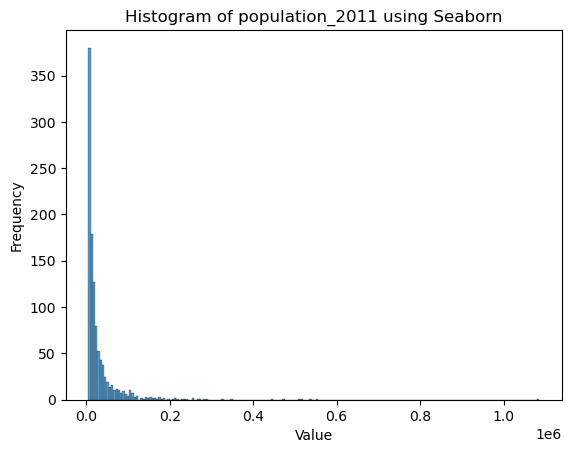

-----------------
Categorical Feature -  size_flag
Small Towns         662
Medium Towns        331
Large Towns          89
City                 18
Inner London BUA      1
Outer london BUA      1
Other Small BUAs      1
Not BUA               1
Name: count, dtype: int64
Bar plot of size_flag using Pandas


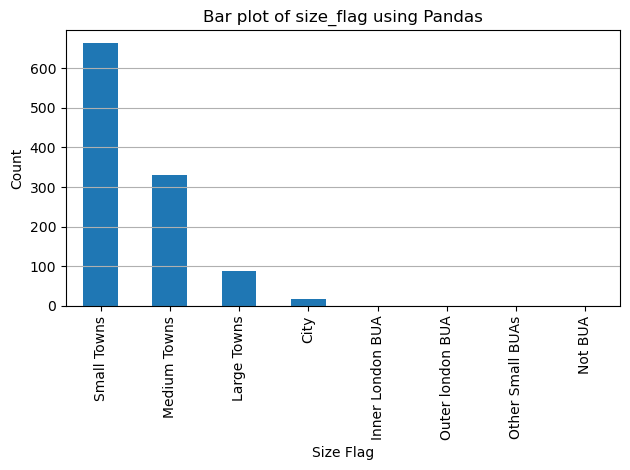

-----
Bar plot of size_flag using Seaborn


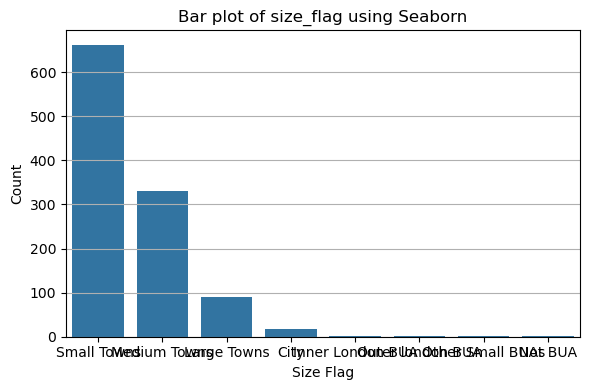

In [39]:
# Assignment 2
# Numerical Features
# Using Pandas
print(df.describe())
df["population_2011"].hist(bins=200)
plt.title("Histogram of population_2011 using Pandas")
plt.xlabel("Value")
plt.ylabel("Frequency")
print("Histogram of population_2011 using Pandas")
plt.show()
print("-----")
# Using Seaborn
sns.histplot(df["population_2011"], bins=200)
plt.title("Histogram of population_2011 using Seaborn")
plt.xlabel("Value")
plt.ylabel("Frequency")
print("Histogram of population_2011 using Seaborn")
plt.show()

print("-----------------")
# Categorical Features
# Using Pandas
print("Categorical Feature - ", df["size_flag"].value_counts())
df["size_flag"].value_counts().plot(kind="bar")
plt.title("Bar plot of size_flag using Pandas")
plt.xlabel("Size Flag")
plt.ylabel("Count")
plt.grid(axis="y")
plt.tight_layout()
print("Bar plot of size_flag using Pandas")
plt.show()

print("-----")
# Using Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="size_flag")
plt.title("Bar plot of size_flag using Seaborn")
plt.xlabel("Size Flag")
plt.ylabel("Count")
plt.grid(axis="y")
plt.tight_layout()
print("Bar plot of size_flag using Seaborn")
plt.show()

### Assignment 3: Bivariate Analysis (10 Points) ###
- Choose three pairs of numerical variables and create scatter plots to explore their relationships.
- Create boxplots for one numerical variable grouped by a categorical variable.

***Hint*** 
- When creating scatter plots with **plt.scatter()** or **sns.scatterplot()**, it might be helpful to color points by a third categorical variable using the hue parameter in **Seaborn**.
- Use **sns.boxplot()** to create boxplots. Consider using the hue parameter if you have sub-categories within your categorical variable.

key_stage_2_attainment_school_year_2007_to_2008 & key_stage_4_attainment_school_year_2012_to_2013 by job_density_flag


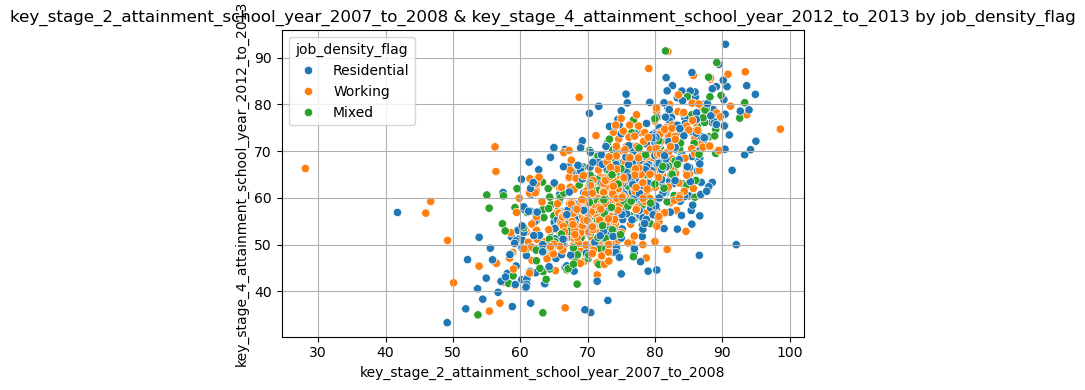

-----
activity_at_age_19_employment_with_earnings_above_0 & activity_at_age_19_employment_with_earnings_above_10_000 by education_score


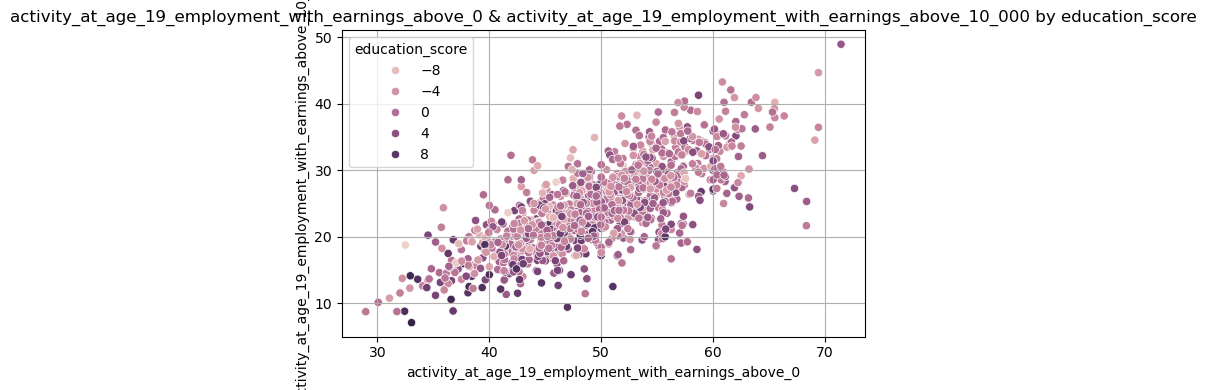

-----
level_2_at_age_18 & level_3_at_age_18 by income_flag


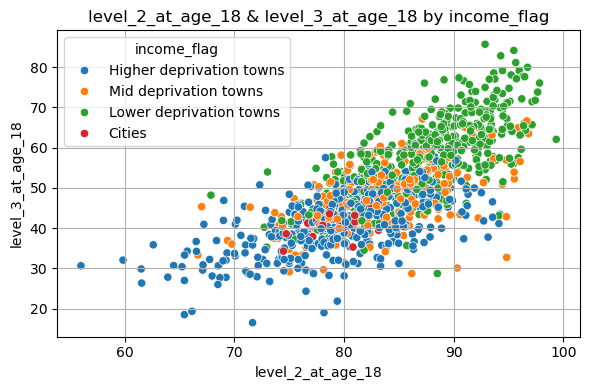

-----
level_2_at_age_18 & level_3_at_age_18 by university_flag


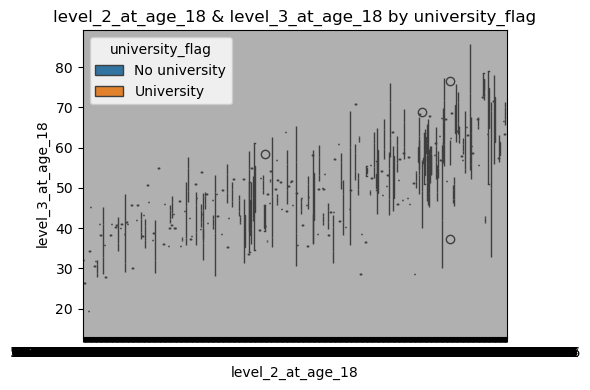

In [40]:
# Assignment 3
# Pair 1: key_stage_2_attainment_school_year_2007_to_2008 & key_stage_4_attainment_school_year_2012_to_2013 by job_density_flag
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="key_stage_2_attainment_school_year_2007_to_2008",
    y="key_stage_4_attainment_school_year_2012_to_2013",
    hue="job_density_flag",
)
plt.title(
    "key_stage_2_attainment_school_year_2007_to_2008 & key_stage_4_attainment_school_year_2012_to_2013 by job_density_flag"
)
plt.grid(True)
plt.tight_layout()
print(
    "key_stage_2_attainment_school_year_2007_to_2008 & key_stage_4_attainment_school_year_2012_to_2013 by job_density_flag"
)
plt.show()

print("-----")
# Pair 2: activity_at_age_19_employment_with_earnings_above_0 & activity_at_age_19_employment_with_earnings_above_10_000 by education_score
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="activity_at_age_19_employment_with_earnings_above_0",
    y="activity_at_age_19_employment_with_earnings_above_10_000",
    hue="education_score",
)
plt.title(
    "activity_at_age_19_employment_with_earnings_above_0 & activity_at_age_19_employment_with_earnings_above_10_000 by education_score"
)
plt.grid(True)
plt.tight_layout()
print(
    "activity_at_age_19_employment_with_earnings_above_0 & activity_at_age_19_employment_with_earnings_above_10_000 by education_score"
)
plt.show()

print("-----")
# Pair 3: level_2_at_age_18 & level_3_at_age_18 by income_flag
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df, x="level_2_at_age_18", y="level_3_at_age_18", hue="income_flag"
)
plt.title("level_2_at_age_18 & level_3_at_age_18 by income_flag")
plt.grid(True)
plt.tight_layout()
print("level_2_at_age_18 & level_3_at_age_18 by income_flag")
plt.show()

print("-----")
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df, x="level_2_at_age_18", y="level_3_at_age_18", hue="university_flag"
)
plt.title("level_2_at_age_18 & level_3_at_age_18 by university_flag")
plt.grid(True)
plt.tight_layout()
print("level_2_at_age_18 & level_3_at_age_18 by university_flag")
plt.show()

### Assignment 4: Missing Data and Outliers (10 Points) ###
- Identify any missing values in the dataset.
- Detect outliers in the numerical features using an appropriate method (e.g., Z-score, IQR).

***Hint***
- The **.isnull()** method chained with **.sum()** can help identify missing values.
- Consider using the **scipy.stats** module for Z-score computation or the IQR which is the range between the first and third quartile of your data distribution for outlier detection.

In [41]:
# Assignment 4
print("Missing Values by Column:")
print(df.isnull().sum())
print("-----")
missing_percent = df.isnull().mean() * 100
print("Percentage of Missing Values by Column:")
print(missing_percent[missing_percent > 0])
print("-----")
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Missing Values by Column:
town11cd                                                               4
town11nm                                                               0
population_2011                                                        4
size_flag                                                              0
rgn11nm                                                                2
coastal                                                                4
coastal_detailed                                                       4
ttwa11cd                                                               4
ttwa11nm                                                               4
ttwa_classification                                                    4
job_density_flag                                                       4
income_flag                                                            4
university_flag                                                        4
level4qual_residents35_64

## Part 2: Data Preprocessing ##

### Assignment 5: Handling Missing Values (20 Points) ###
- Choose appropriate methods to handle the missing data (e.g., imputation, removal).
 
***Hint***
- Imputation methods could involve using **.fillna()** with measures like mean (**data.mean()**) for numerical columns and mode (**data.mode().iloc[0]**) for categorical columns.
- For removal, **.dropna()** is straightforward but consider the impact on your dataset size.

In [42]:
# Assignment 5
print("Missing values per column:\n", df.isnull().sum())
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
for col in df.select_dtypes(include=["object", "category"]).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
print("-----")
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values per column:
 town11cd                                                               4
town11nm                                                               0
population_2011                                                        4
size_flag                                                              0
rgn11nm                                                                2
coastal                                                                4
coastal_detailed                                                       4
ttwa11cd                                                               4
ttwa11nm                                                               4
ttwa_classification                                                    4
job_density_flag                                                       4
income_flag                                                            4
university_flag                                                        4
level4qual_residents35_

### Assignment 6: Dealing with Outliers (10 Points) ###
- Treat or remove the outliers identified earlier based on your chosen methodology.

***Hint*** 
- For outlier removal, you may use boolean indexing based on Z-scores or IQR to filter your data.
- If you don’t want to remove outliers, consider transforming them using methods such as log transformation.

In [43]:
# Assignment 6
print("Original shape:", df.shape)
print("-----")
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Shape after outlier removal:", df.shape)


Original shape: (1104, 31)
-----
Shape after outlier removal: (471, 31)


### Assignment 7: Feature Engineering (10 Points) ###
- Create at least one new feature that could be useful for a data mining task.

***Hint*** 
- Think about the domain knowledge related to your dataset that could suggest new features. For instance, if you have date-time information, extracting the day of the week could be useful.
- Also, combining features, if relevant, to create ratios or differences can often reveal useful insights.

In [44]:
# Assignment 7
df["total_qualification_levels"] = (
    df["highest_level_qualification_achieved_by_age_22_less_than_level_1"]
    + df["highest_level_qualification_achieved_by_age_22_level_1_to_level_2"]
    + df["highest_level_qualification_achieved_by_age_22_level_3_to_level_5"]
)
print(df[["total_qualification_levels"]].head())
print(df.head())

    total_qualification_levels
0                    77.362857
2                    68.362857
9                    77.362857
10                   69.462857
12                   77.062857
     town11cd                 town11nm  population_2011    size_flag  \
0   E34000007  Carlton in Lindrick BUA           5456.0  Small Towns   
2   E34000020                  Ely BUA          19090.0  Small Towns   
9   E34000067              Royston BUA          15781.0  Small Towns   
10  E34000068              Studley BUA           6203.0  Small Towns   
12  E34000109           Freshwater BUA           7829.0  Small Towns   

            rgn11nm      coastal          coastal_detailed   ttwa11cd  \
0     East Midlands  Non-coastal  Smaller non-coastal town  E30000291   
2   East of England  Non-coastal  Smaller non-coastal town  E30000186   
9   East of England  Non-coastal  Smaller non-coastal town  E30000186   
10    West Midlands  Non-coastal  Smaller non-coastal town  E30000169   
12       South E

### Assignment 8: Data Transformation (10 Points) ###
- Standardize or normalize numerical features.
- Perform any additional transformations you deem necessary (e.g., encoding categorical variables, binning, etc.).

***Hint*** 
- For scaling, **StandardScaler** or **MinMaxScaler** from **sklearn.preprocessing** can be applied to numerical features.
- For normalization, **np.log1p()** (log(1+x)) can help in managing skewed data.
- Use **pd.get_dummies()** or **LabelEncoder/OneHotEncoder** from **sklearn.preprocessing** for encoding categorical variables.

In [45]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = df[numerical_cols].apply(lambda x: np.log1p(x - x.min() + 1))
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print(df.head())

    town11cd  town11nm  population_2011  size_flag  rgn11nm  coastal  \
0          0        76         0.719641          1        0        1   
2          1       143         1.336338          1        1        1   
9          2       329         1.217881          1        1        1   
10         3       391         0.765306          1        6        1   
12         4       154         0.858036          1        4        0   

    coastal_detailed  ttwa11cd  ttwa11nm  ttwa_classification  ...  \
0                  3       130       133                    3  ...   
2                  3        41        25                    2  ...   
9                  3        41        25                    2  ...   
10                 3        26         9                    0  ...   
12                 5         9        63                    3  ...   

    activity_at_age_19_employment_with_earnings_above_0  \
0                                            1.616953     
2                           